For anmiation of GOL in python https://www.geeksforgeeks.org/conways-game-life-python-implementation/

# Implementing GOL

In [179]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# setting up the values for the grid
ON = 255
OFF = 0
vals = [ON, OFF]
 
def randomGrid(N):
 
    """returns a grid of NxN random values"""
    return np.random.choice(vals, N*N, p=[0.2, 0.8]).reshape(N, N)

def update(steps,grid, N):
 
    # copy grid since we require 8 neighbors
    # for calculation and we go line by line
  
    for s in range(steps):
        newGrid = grid.copy()
        for i in range(N):
            for j in range(N):

                # compute 8-neghbor sum
                # using toroidal boundary conditions - x and y wrap around
                # so that the simulaton takes place on a toroidal surface.
                total = int((grid[i, (j-1)%N] + grid[i, (j+1)%N] +
                             grid[(i-1)%N, j] + grid[(i+1)%N, j] +
                             grid[(i-1)%N, (j-1)%N] + grid[(i-1)%N, (j+1)%N] +
                             grid[(i+1)%N, (j-1)%N] + grid[(i+1)%N, (j+1)%N])/255)
                
                # apply Conway's rules
                if grid[i, j]  == ON:
                    if (total < 2) or (total > 3):
                        newGrid[i, j] = OFF
                else:
                    if total == 3:
                        newGrid[i, j] = ON

        # update data
        grid[:] = newGrid[:]
    return(grid[:])

def timeseries(numofsteps,grid,N):
    series= []
    series.append(grid.copy())
    for s in range(numofsteps):
        update(1,grid,N)
        series.append(grid.copy())
    return(series)


    

In [169]:
grid=np.array([[255,0,0],[0,255,0],[255,0,0]])
print(grid)
update(1,grid,3)

[[255   0   0]
 [  0 255   0]
 [255   0   0]]
2 0 0
3 0 1
3 0 2
3 1 0
2 1 1
3 1 2
2 2 0
3 2 1
3 2 2


array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]])

In [13]:
N=30
steps=1
grid = randomGrid(N)
np.save("./timeseriesdata",timeseries(steps,grid,N))

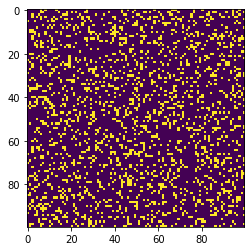

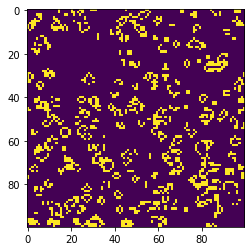

In [3]:
N=100
fig, ax = plt.subplots()
grid=randomGrid(N)
#grid=np.array([[255,0,0,0,0],[0,0,255,0,0],[0,255,0,0,0],[0,0,0,0,0],[0,0,0,0,0]])
img = ax.imshow(grid, interpolation='nearest')
for i in range(1):
    fig, ax = plt.subplots()
    update(10,grid,N)
    ax.imshow(grid, interpolation='nearest')

# Implementing some learning
See this for reference https://arxiv.org/pdf/1807.10300.pdf  
Tensorflow intro: https://www.tensorflow.org/tutorials/quickstart/beginner  
Loss functions: https://keras.io/api/losses/  
2D Convolutional layer: https://keras.io/api/layers/convolution_layers/convolution2d/  
for periodic padding see: https://stackoverflow.com/questions/39088489/tensorflow-periodic-padding  

Input: 3x3 layer  
Then either convolutional layers, or dense layers (or both).  
Output should by the probabilities of the central cell being ON or OFF  
i.e. last layer output of size 2 with 'softmax' activation  

In [265]:
#generating a training and test dataset
import tensorflow as tf

#defining the learning model
numofgrids=200
(x_train,y_train)=([],[])
for i in range(numofgrids):
    grid=randomGrid(3)
    x_train.append(grid.copy())
    update(1,grid,3)
    y_train.append(grid[1,1].copy())

x_train =np.array(x_train).reshape(200,3,3,1)
y_train =np.array(y_train).reshape(200,1)/256

modelA = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(9,3,
        input_shape=(3,3,1),
        strides=(1, 1),
        padding="valid",
        data_format=None,
        dilation_rate=(1, 1),
        groups=1,
        activation=None,
        use_bias=True,
        kernel_initializer="glorot_uniform",
        bias_initializer="zeros",
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None),
    tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(9),
    tf.keras.layers.Dense(2,activation="softmax")
])
predictions = modelA(x_train).numpy()
print(1)
#print(tf.nn.softmax(predictions).numpy())
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
print(2)
loss_fn(y_train, predictions).numpy()
print(3)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])
print(4)
model.fit(x_train, y_train, epochs=5)
print(5)
modelB = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])


1
2
3
4
Epoch 1/5


ValueError: in user code:

    /home/manu/.local/lib/python3.8/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /home/manu/.local/lib/python3.8/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/manu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        
    /home/manu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        
    /home/manu/.local/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        
    /home/manu/.local/lib/python3.8/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /home/manu/.local/lib/python3.8/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /home/manu/.local/lib/python3.8/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /home/manu/.local/lib/python3.8/site-packages/keras/engine/sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    /home/manu/.local/lib/python3.8/site-packages/keras/engine/functional.py:414 call
        return self._run_internal_graph(
    /home/manu/.local/lib/python3.8/site-packages/keras/engine/functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    /home/manu/.local/lib/python3.8/site-packages/keras/engine/base_layer.py:1020 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /home/manu/.local/lib/python3.8/site-packages/keras/engine/input_spec.py:250 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer dense_6 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape (None, 9)


In [206]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


11501568/11490434 [==============================] - 0s 0us/step


In [254]:
y_train.reshape(200,1)

array([[  0],
       [255],
       [255],
       [255],
       [  0],
       [  0],
       [  0],
       [255],
       [  0],
       [  0],
       [  0],
       [255],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [255],
       [  0],
       [  0],
       [255],
       [255],
       [255],
       [  0],
       [  0],
       [  0],
       [255],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [255],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [255],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [255],
       [  0],
       [255],
       [255],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [  0],
       [255],
      

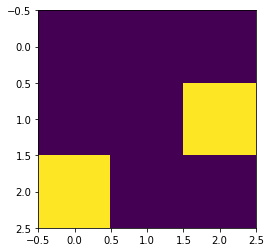

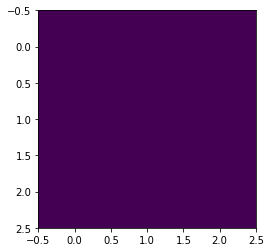

In [147]:

N=3
time=1
grid=randomGrid(N)

gridev=timeseries(time,grid,N)
for t in range(time+1):
    fig, ax = plt.subplots()
    fig=ax.imshow(gridev[t], interpolation='nearest')

2 0 0
3 0 1
3 0 2
3 1 0
2 1 1
3 1 2
2 2 0
3 2 1
3 2 2
[[255   0   0]
 [  0 255   0]
 [255   0   0]]
[[255 255 255]
 [255 255 255]
 [255 255 255]]


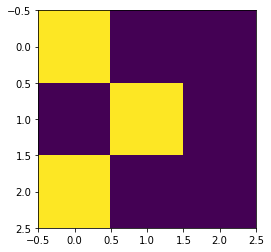

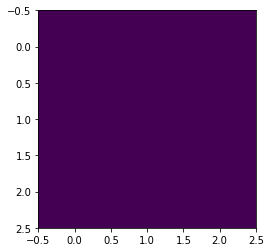

In [173]:

N=3
time=1
grid=np.array([[255,0,0],[0,255,0],[255,0,0]])
#grid=np.array([[0,0,0,0,0],[0,255,0,0,0],[0,0,255,0,0],[0,255,0,0,0],[0,0,0,0,0]])
gridev=timeseries(time,grid,N)

for t in range(time+1):
    print(gridev[t])
    fig, ax = plt.subplots()
    fig=ax.imshow(gridev[t], interpolation='none')